In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
%pylab inline
from numpy.linalg import *
import sympy as sp

from mpl_toolkits import mplot3d
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


#Laboratorio 4
##Jhoan Alejandro Londoño Restrepo
C.C.1000194087

1. Para simular un conjunto de características $x_1, x_2, \ldots, x_n$ trabajaremos en la primera parte con dos características de datos aleatorios que presentan un plano y mostraremos que los párametros optimizados se corresponden con el valor esperado.

- Definir la ecuación $y=2.1 * x_1-3.1 * x_2$ y generar números aleatorios que pertenecen al plano.

- Realizar un diagrama 3D de los puntos generados aleatoriamente.

In [ ]:
N = 100

x1 = np.zeros(N)
x2 = np.zeros(N)
y = np.zeros(N)

for i in range(N):
  x1[i] = np.random.randint(0,100)
  x2[i] = np.random.randint(0,100)

#y = func([x1,x2])
for i in range(N):
  y[i] = 2.1*x1[i] + 3.1*x2[i]

In [ ]:
xx, yy = np.meshgrid(range(100), range(100))
z = 2.1*xx + 3.1*yy

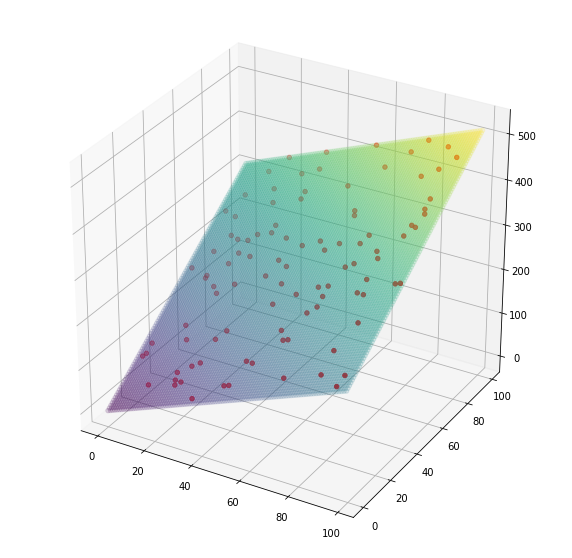

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xx, yy, z, c=z, cmap='viridis', alpha=0.15)
ax.scatter(x1, x2, y, c="r", cmap='viridis')

#Regresión Lineal

El objetivo de una reegresión lineal es predecir la respuesta cuantitativa de $y$ en base a varios predictores

$$
y = f(x) + \epsilon
$$

$$
y \approx \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n
$$

Donde $x_0 = 1$

Usando el conjunto de datos de entrenamiento, queremos encontrar un estimado para $\hat \theta_i$, de manera que podamos tener una predicción de $y$ en base a nuestro conjunto de datos 

$$
\hat y \approx  \hat\theta_0 x_0 + \hat\theta_1 x_1 + \hat\theta_2 x_2 + \cdots + \hat\theta_n x_n
$$

Si los $\beta_i$ son desconocidos la manera de estimarlos es la siguiente:

Definimos una medida de "cercanía"

$$
E[y - \hat y]^2 = [f(x) - \hat f(x)]^2 + Var[\epsilon]
$$

Hacemos el error cuadrático medio:

$$ECM = \frac{1}{m} \sum_{i=1}^m [y_i - f(x_i)]
$$ 

$n$ = número de predictores
$m$ = número de medidas o experimentos 

En el caso general de $n$ predictores el error cuadrático medio queda:

$$ECM = \frac{1}{m} \sum_{i=1}^m [y^{(i)} - f(x_0^{(i)}, x_1^{(i)}, x_2^{(i)}, \cdots, x_n^{(i)})]
$$ 

$$$$

$$
\hat y^{(0)} =  \hat\theta_0 x_0^{(0)} + \hat\theta_1 x_1^{(0)} + \cdots + \hat\theta_n x_n^{(0)}
$$

$$
\hat y^{(01)} =  \hat\theta_0 x_0^{(1)} + \hat\theta_1 x_1^{(1)} + \cdots + \hat\theta_n x_n^{(1)}
$$

$$ \vdots$$

$$
\hat y^{(m)} =  \hat\theta_0 x_0^{(m)} + \hat\theta_1 x_1^{(m)} + \cdots + \hat\theta_n x_n^{(m)}
$$

Escribimos la ecuación de forma matricial:

$\boldsymbol y = \boldsymbol X \boldsymbol \theta $

Donde

$\boldsymbol y = (y^{(0)} \cdots y^{(m)})^T$

$\boldsymbol \theta = (\theta_0 \cdots \theta_n)^T$

$$
\boldsymbol X = \begin{pmatrix}
1 & \cdots & x_n^0 \\
\vdots & \ddots & \vdots \\
1 & \cdots & x_n^n
\end{pmatrix}
$$

$\boldsymbol y = \boldsymbol X_{[m,n]} \boldsymbol \theta_{[n]} $

Así, escribimos el error cuadrático medio o la función de coste de la forma:

$$ECM = \frac{1}{m} \sum_{i=1}^m [y^{(i)} - f(x_0^{(i)}, x_1^{(i)}, x_2^{(i)}, \cdots, x_n^{(i)})]
$$ 

$$ ECM = \frac{1}{m} (\boldsymbol y - \boldsymbol X \boldsymbol \theta)^T (\boldsymbol y - \boldsymbol X \boldsymbol \theta)
$$

1. Inicializar conjunto de parámetros $\boldsymbol \theta$ de manera aleatoria.

In [ ]:
Theta = np.random.rand(3)*100
np.shape(Theta)

(3,)

2. Construir la matrix X con dimensiones (n+1, m), m es el numero de datos de entrenamiento y (n) el número de caracteristicas.

In [ ]:
Xarray = np.c_[np.ones((N,1)),x1,x2]

In [ ]:
np.shape(Xarray)

(100, 3)

3. Calcular la función de coste(revise cuidosamente las dimensiones de cada matriz):


$$ ECM = \frac{1}{m} (\boldsymbol y - \boldsymbol X \boldsymbol \theta)^T (\boldsymbol y - \boldsymbol X \boldsymbol \theta)
$$

In [ ]:
ECM = (1/100)*(y - (Xarray.dot(Theta))).T.dot(y - (Xarray.dot(Theta)))
ECM

47776083.720815726

De forma general, construimos la función de coste

In [ ]:
def fcoste2(m):

  x1 = np.zeros(m)
  x2 = np.zeros(m)
  y = np.zeros(m)

  thetas =  np.array([sp.Symbol(r"theta_0"),
                      sp.Symbol(r"theta_1"), 
                      sp.Symbol(r"theta_2")])

  for i in range(m):
    x1[i] = np.random.randint(0,100)
    x2[i] = np.random.randint(0,100)

  for i in range(m):
    y[i] = 2.1*x1[i] + 3.1*x2[i]

  xs = np.c_[np.ones((m,1)),x1,x2]

  B = (1/m)*(y - (xs.dot(thetas))).T.dot(y - (xs.dot(thetas))) #Ecuación matricial del error cuadrático medio/ función de coste

  return B

Tomando 5 puntos sobre el plano la función tiene la forma funcional de:

In [ ]:
fcoste2(5)

36.45*(-0.0740740740740741*theta_0 - 0.148148148148148*theta_1 - 0.222222222222222*theta_2 + 1)**2 + 1552.322*(-0.0113507377979569*theta_0 - 0.0908059023836549*theta_1 - 0.261066969353008*theta_2 + 1)**2 + 4106.978*(-0.00697836706210747*theta_0 - 0.146545708304257*theta_1 - 0.223307745987439*theta_2 + 1)**2 + 11309.768*(-0.00420521446593776*theta_0 - 0.147182506307822*theta_1 - 0.222876366694701*theta_2 + 1)**2 + 23283.488*(-0.00293083235638921*theta_0 - 0.290152403282532*theta_1 - 0.126025791324736*theta_2 + 1)**2

Convertimos la función de simbólica a numérica

In [ ]:
import sympy
from sympy import *

A = sympy.Symbol(r"theta_0")
B = sympy.Symbol(r"theta_1")
C = sympy.Symbol(r"theta_2")

H = lambdify([A,B,C], fcoste2(100), "numpy")
H(5,8,3)

124747.52649999999

4. Aplicar el gradiente descendente:

Tomando un learning rate de 0.0001, 100 puntos sobre el plano y 500000 iteraciones observemos como se comporta la función de coste y el vector theta que la minimiza cada 5000 iteraciones

In [ ]:
h = 0.0001 #para el calculo de derivada numérica
lr = 0.0001#learning rate

Theta = np.random.rand(3)*10 #Tomamos un theta inicial aleatorio

Gradiente = np.zeros(3) #creamos 

for j in range(500000):
  for i in range(3):
    T = np.copy(Theta)
    T[i] = T[i] + h #incrementamos un h en la componente en x, y, z del vector theta
    derivada = (H(T[0],T[1],T[2]) - H(Theta[0],Theta[1],Theta[2]))/h #Calculo de la derivada en su respectiva componente
    Gradiente[i] = derivada
    
  Theta = Theta - lr *Gradiente  #Aplicamos gradiente descendente

  if (j%5000 ==0):
    print(f" fcoste = {H(Theta[0],Theta[1],Theta[2])} \t θ₀ =  {Theta[0]} \t θ₁ = {Theta[1]} \t θ₂ = {Theta[2]}") #imprimimos el valor de la función de coste y los thetas para una iteración i-ésima

 fcoste = 7200.491337564741 	 θ₀ =  4.124768072449426 	 θ₁ = -0.15283453031046923 	 θ₂ = 4.773758160797085
 fcoste = 1.7957624446789235 	 θ₀ =  3.597237086909789 	 θ₁ = 2.0691861660347635 	 θ₂ = 3.0702218489295676
 fcoste = 1.3628977593942317 	 θ₀ =  3.133833194177747 	 θ₁ = 2.073151515927668 	 θ₂ = 3.074054835158578
 fcoste = 1.0346338114718894 	 θ₀ =  2.7304678628219006 	 θ₁ = 2.076603115490343 	 θ₂ = 3.0773912200802265
 fcoste = 0.7856607757449054 	 θ₀ =  2.3793625029140846 	 θ₁ = 2.079607526163488 	 θ₂ = 3.0802953433095825
 fcoste = 0.5967972718219963 	 θ₀ =  2.0737463178514886 	 θ₁ = 2.0822226856943353 	 θ₂ = 3.082823208627669
 fcoste = 0.4535058795005403 	 θ₀ =  1.807725734751876 	 θ₁ = 2.0844990254214033 	 θ₂ = 3.085023563971346
 fcoste = 0.3447683116016174 	 θ₀ =  1.5761707514372114 	 θ₁ = 2.0864804428041475 	 θ₂ = 3.0869388414996948
 fcoste = 0.26223309783823046 	 θ₀ =  1.3746160082924392 	 θ₁ = 2.0882051479515957 	 θ₂ = 3.088605975865597
 fcoste = 0.19956975045849015 	 θ₀ =  

Como podemos observar la función de coste va disminuyendo mientras más iteraciones hacemos llegando hasta un orden de $10^{-5}$, por tanto, los valores que obtuvimos de theta son significativamente cercanos al valor real, obteniendo un valor de:

$$\theta_{0} ≈ 0$$

$$\theta_{1} ≈ 2.1$$

$$\theta_{2} ≈ 3.1$$

Que son los valores que desde un principio queríamos encontrar